![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import any additional modules and start coding below

In [65]:
df = pd.read_csv("rental_info.csv", parse_dates=['rental_date','return_date'])
df.head()


,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


Adding an additional column named rental_length_days which is a difference of return_date to rental_date

In [66]:
df['rental_length_days'] = (df['return_date']-df['rental_date']).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   rental_date         15861 non-null  datetime64[ns, UTC]
 1   return_date         15861 non-null  datetime64[ns, UTC]
 2   amount              15861 non-null  float64            
 3   release_year        15861 non-null  float64            
 4   rental_rate         15861 non-null  float64            
 5   length              15861 non-null  float64            
 6   replacement_cost    15861 non-null  float64            
 7   special_features    15861 non-null  object             
 8   NC-17               15861 non-null  int64              
 9   PG                  15861 non-null  int64              
 10  PG-13               15861 non-null  int64              
 11  R                   15861 non-null  int64              
 12  amount_2            15861 non-nu

In [67]:
df['special_features'].unique()

array(['{Trailers,"Behind the Scenes"}', '{Trailers}',
       '{Commentaries,"Behind the Scenes"}', '{Trailers,Commentaries}',
       '{"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes","Behind the Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes"}',
       '{"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes"}', '{Commentaries}',
       '{Trailers,Commentaries,"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes"}', '{"Deleted Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}'],
      dtype=object)

In [68]:
df['deleted_scenes'] = np.where(df['special_features'].str.contains('"Deleted Scenes"'),1,0)
df['behind_the_scenes'] = np.where(df['special_features'].str.contains('"Behind the Scenes"'),1,0)
df.drop(['special_features','rental_date','return_date'],axis=1,inplace=True)

In [69]:
df.head()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,deleted_scenes,behind_the_scenes
0,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,3,0,1
1,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,0,1
2,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,7,0,1
3,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,0,1
4,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,4,0,1


In [70]:
from sklearn.model_selection import train_test_split
X = df.drop('rental_length_days',axis = 1)
y = df['rental_length_days']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 9)

In [71]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

names = df.drop('rental_length_days',axis = 1).columns
lasso = Lasso(alpha=0.3)
coeff = lasso.fit(X_train,y_train).coef_
lasso_greater_zero = np.abs(coeff)>0
select_feature = X_train.columns[lasso_greater_zero]
select_feature

Index(['amount', 'amount_2', 'length_2', 'rental_rate_2'], dtype='object')

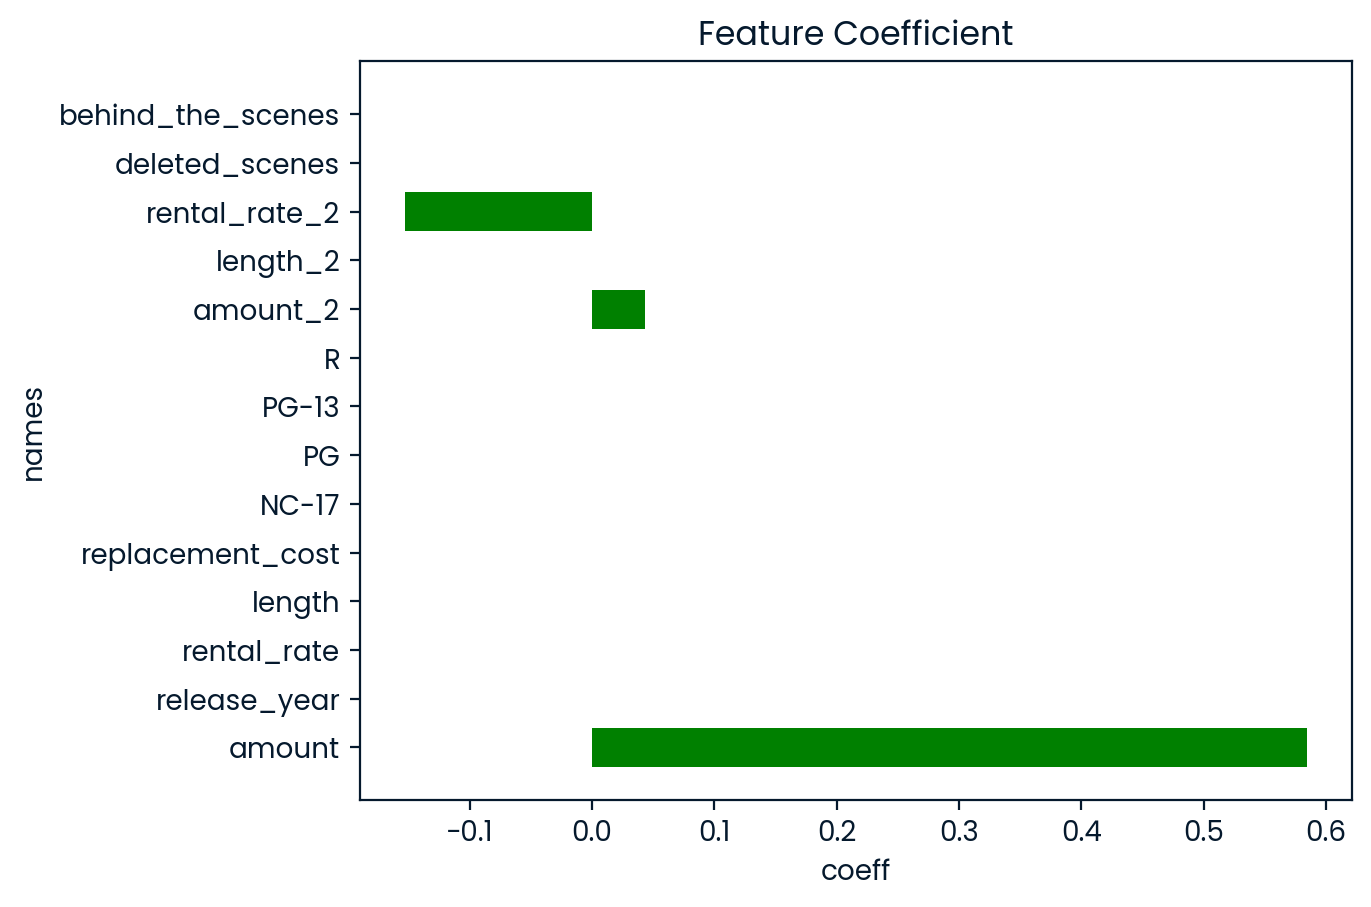

In [72]:
plt.barh(names,coeff, color = 'g')
plt.xlabel('coeff')
plt.ylabel('names')
plt.title('Feature Coefficient')
plt.show()

In [73]:
X_train = X_train[select_feature]
X_test = X_test[select_feature]

In [74]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr =lr.predict(X_test)
mse_lr = mean_squared_error(y_test,y_pred_lr)
print(f"Mean Square Error from Linear Regression: {mse_lr}")
#DecisionTreeClassifier
dt = DecisionTreeRegressor(max_depth=8,
            min_samples_leaf=0.13,
           random_state=9)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test,y_pred_dt)
print(f"Mean Square Error from Decision Tree Regressor: {mse_dt}")
#RandomForestRegressor
rf = RandomForestRegressor(n_estimators=51,max_depth=10
           ,random_state=9)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
print(f"Mean Square Error from Random Forest Regressor: {mse_rf}")

Mean Square Error from Linear Regression: 3.0923563956298517
Mean Square Error from Decision Tree Regressor: 3.3215025669433933
Mean Square Error from Random Forest Regressor: 2.3885799045268676


In [75]:
#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_dist = {'n_estimators': np.arange(1,101,1),
          'max_depth':np.arange(1,11,1)}
cv = RandomizedSearchCV(rf,param_distributions=param_dist,cv=5, random_state=9)
cv.fit(X_train,y_train)
# Print the tuned parameters and score
print("Tuned Random Forest Regressor Parameters: {}".format(cv.best_params_))
print("Tuned Random Forest Regressor Best Accuracy Score: {}".format(cv.best_score_))

Tuned Random Forest Regressor Parameters: {'n_estimators': 51, 'max_depth': 10}
Tuned Random Forest Regressor Best Accuracy Score: 0.6660068593981479


In [76]:
best_model  = rf
best_mse = mse_rf